## Data Prep

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns
pd.show_versions()
import sys
import graphviz
sys.executable
#import graphviz


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.5.final.0
python-bits: 32
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: None.None

pandas: 0.24.0
pytest: None
pip: 18.1
setuptools: 39.0.1
Cython: None
numpy: 1.14.3
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 6.4.0
sphinx: None
patsy: 0.5.1
dateutil: 2.7.3
pytz: 2018.4
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 2.2.2
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml.etree: 4.2.5
bs4: None
html5lib: 1.0.1
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


'c:\\users\\rapp\\appdata\\local\\programs\\python\\python36-32\\python.exe'

In [2]:
data = [pd.read_csv('asos_snotel_UA_12hr_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_snotel_UA_df = pd.concat(data)
#asos_snotel_UA_df['LXV_WindSpeed_m/s']

#asos_snotel_UA_df.rename(columns={'LXV_WindSpeed_m/s': 'LXV_WindSpeed_mps'}, inplace=True)

asos_snotel_UA_df.astype('float16')
pd.set_option('display.expand_frame_repr', True)


print(asos_snotel_UA_df.keys())



Index(['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
       'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps',
       'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm',
       'LXV_Temperature_degC', 'LXV_Dewpoint_degC',
       ...
       'KGJT_d300_200_height_m', 'KGJT_d300_200_tmpc', 'KGJT_d300_200_dwpc',
       'KGJT_d300_200_drct', 'KGJT_d300_200_speed_kts',
       'KGJT_d250_200_height_m', 'KGJT_d250_200_tmpc', 'KGJT_d250_200_dwpc',
       'KGJT_d250_200_drct', 'KGJT_d250_200_speed_kts'],
      dtype='object', length=163)


In [3]:
all_yrs = (asos_snotel_UA_df.index >= '01-01-2006') & (asos_snotel_UA_df.index < '01-01-2018')
variables = ['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas', \
 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_CloudCover_oktas', 'LXV_12hr_delta_Pressure_hp', \
 'KGJT_200mb_height_m', 'KGJT_200mb_tmpc', 'KGJT_200mb_dwpc', 'KGJT_200mb_drct', 'KGJT_200mb_speed_kts', \
 'KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts', \
 'KGJT_300mb_height_m', 'KGJT_300mb_tmpc', 'KGJT_300mb_dwpc', 'KGJT_300mb_drct', 'KGJT_300mb_speed_kts', \
 'KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts', \
 'KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_500mb_drct', 'KGJT_500mb_speed_kts', \
 'KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts', \
 'KGJT_850mb_height_m', 'KGJT_850mb_tmpc', 'KGJT_850mb_dwpc', 'KGJT_850mb_drct', 'KGJT_850mb_speed_kts', \
 'KGJT_d850_700_height_m', 'KGJT_d850_700_tmpc', 'KGJT_d850_700_dwpc', 'KGJT_d850_700_drct', 'KGJT_d850_700_speed_kts', \
 'KGJT_d850_500_height_m', 'KGJT_d850_500_tmpc', 'KGJT_d850_500_dwpc', 'KGJT_d850_500_drct', 'KGJT_d850_500_speed_kts', \
 'KGJT_d850_400_height_m', 'KGJT_d850_400_tmpc', 'KGJT_d850_400_dwpc', 'KGJT_d850_400_drct', 'KGJT_d850_400_speed_kts', \
 'KGJT_d850_300_height_m', 'KGJT_d850_300_tmpc', 'KGJT_d850_300_dwpc', 'KGJT_d850_300_drct', 'KGJT_d850_300_speed_kts', \
 'KGJT_d850_250_height_m', 'KGJT_d850_250_tmpc', 'KGJT_d850_250_dwpc', 'KGJT_d850_250_drct', 'KGJT_d850_250_speed_kts', \
 'KGJT_d850_200_height_m', 'KGJT_d850_200_tmpc', 'KGJT_d850_200_dwpc', 'KGJT_d850_200_drct', 'KGJT_d850_200_speed_kts',\
 'KGJT_d700_500_height_m', 'KGJT_d700_500_tmpc', 'KGJT_d700_500_dwpc', 'KGJT_d700_500_drct', 'KGJT_d700_500_speed_kts', \
 'KGJT_d700_400_height_m', 'KGJT_d700_400_tmpc', 'KGJT_d700_400_dwpc', 'KGJT_d700_400_drct', 'KGJT_d700_400_speed_kts', \
 'KGJT_d700_300_height_m', 'KGJT_d700_300_tmpc', 'KGJT_d700_300_dwpc', 'KGJT_d700_300_drct', 'KGJT_d700_300_speed_kts', \
 'KGJT_d700_250_height_m', 'KGJT_d700_250_tmpc', 'KGJT_d700_250_dwpc', 'KGJT_d700_250_drct', 'KGJT_d700_250_speed_kts', \
 'KGJT_d700_200_height_m', 'KGJT_d700_200_tmpc', 'KGJT_d700_200_dwpc', 'KGJT_d700_200_drct', 'KGJT_d700_200_speed_kts', \
 'KGJT_d500_400_height_m', 'KGJT_d500_400_tmpc', 'KGJT_d500_400_dwpc', 'KGJT_d500_400_drct', 'KGJT_d500_400_speed_kts', \
 'KGJT_d500_300_height_m', 'KGJT_d500_300_tmpc', 'KGJT_d500_300_dwpc', 'KGJT_d500_300_drct', 'KGJT_d500_300_speed_kts', \
 'KGJT_d500_250_height_m', 'KGJT_d500_250_tmpc', 'KGJT_d500_250_dwpc', 'KGJT_d500_250_drct', 'KGJT_d500_250_speed_kts', \
 'KGJT_d500_200_height_m', 'KGJT_d500_200_tmpc', 'KGJT_d500_200_dwpc', 'KGJT_d500_200_drct', 'KGJT_d500_200_speed_kts', \
 'KGJT_d400_300_height_m', 'KGJT_d400_300_tmpc', 'KGJT_d400_300_dwpc', 'KGJT_d400_300_drct', 'KGJT_d400_300_speed_kts', \
 'KGJT_d400_250_height_m', 'KGJT_d400_250_tmpc', 'KGJT_d400_250_dwpc', 'KGJT_d400_250_drct', 'KGJT_d400_250_speed_kts', \
 'KGJT_d400_200_height_m', 'KGJT_d400_200_tmpc', 'KGJT_d400_200_dwpc', 'KGJT_d400_200_drct', 'KGJT_d400_200_speed_kts', \
 'KGJT_d300_250_height_m', 'KGJT_d300_250_tmpc', 'KGJT_d300_250_dwpc', 'KGJT_d300_250_drct', 'KGJT_d300_250_speed_kts', \
 'KGJT_d300_200_height_m', 'KGJT_d300_200_tmpc', 'KGJT_d300_200_dwpc', 'KGJT_d300_200_drct', 'KGJT_d300_200_speed_kts', \
 'KGJT_d250_200_height_m', 'KGJT_d250_200_tmpc', 'KGJT_d250_200_dwpc', 'KGJT_d250_200_drct', 'KGJT_d250_200_speed_kts']

good_vars = []
bad_vars = []
for var in variables:
    idx = np.isfinite(asos_snotel_UA_df[all_yrs]['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']) & np.isfinite(asos_snotel_UA_df[all_yrs][var])
    total_poss = len(asos_snotel_UA_df[all_yrs]['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][asos_snotel_UA_df[all_yrs]['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']>=0])
    total_avail =len(asos_snotel_UA_df[all_yrs][idx])
    if total_avail/total_poss >= 0.67: 
        good_vars.append(var)
    else:
        bad_vars.append(var)
        
print('Variables with >= 67% data match to snowfall: ')
print(good_vars)
print('Variables with < 67% data match to snowfall: ')
print(bad_vars)

Variables with >= 67% data match to snowfall: 
['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_12hr_delta_Pressure_hp', 'KGJT_200mb_height_m', 'KGJT_200mb_tmpc', 'KGJT_200mb_dwpc', 'KGJT_200mb_drct', 'KGJT_200mb_speed_kts', 'KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts', 'KGJT_300mb_height_m', 'KGJT_300mb_tmpc', 'KGJT_300mb_dwpc', 'KGJT_300mb_drct', 'KGJT_300mb_speed_kts', 'KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts', 'KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_500mb_drct', 'KGJT_500mb_speed_kts', 'KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts', 'KGJT_850mb_height_m', 'KGJT_d850_700_height_m', 'KGJT_d850_500_height_

In [4]:
good_vars_snf =[]
filtered_asos_snotel_UA_df = pd.DataFrame()


good_vars_snf = good_vars + ['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']
print(good_vars_snf )
filtered_asos_snotel_UA_df=  asos_snotel_UA_df[good_vars_snf].copy()
test_train_df = asos_snotel_UA_df[good_vars_snf].dropna()


['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_12hr_delta_Pressure_hp', 'KGJT_200mb_height_m', 'KGJT_200mb_tmpc', 'KGJT_200mb_dwpc', 'KGJT_200mb_drct', 'KGJT_200mb_speed_kts', 'KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts', 'KGJT_300mb_height_m', 'KGJT_300mb_tmpc', 'KGJT_300mb_dwpc', 'KGJT_300mb_drct', 'KGJT_300mb_speed_kts', 'KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts', 'KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_500mb_drct', 'KGJT_500mb_speed_kts', 'KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts', 'KGJT_850mb_height_m', 'KGJT_d850_700_height_m', 'KGJT_d850_500_height_m', 'KGJT_d850_400_height_m', 'KGJT_d850_300_he

It is important to keep in mind that 'CMtnSNTL_12hr_SNWD_in contains snow depth info taken at the start of the respective 12hr period timestamp.  The snowfall calculated also gives the snowfall that fell in the 12hrs after the timestamp.  The OLS model will utilize hourly meteorological measurements at exactly 00:00 and 12:00 hours to predict the amount of snow which will fall in the next 12 hour period.  For example, the 00:00 meteorological measurements will be used to predict the snow which fell between 00:00 and 12:00.

# Now try Cross Validation using Timeseries split

In [5]:
#Create a lists of lists with best features for each test/train split set of interest such that
# best_features = [ [#Best Features of Surface Data only 2006,2017 test/2007-2016  train split], [#Best Features of Surface Data only 2006,2017 test/2006-2013,2015-2017 train split], \
# [Best Features of Surface+UA Data only 2006,2017 test/2007-2016  train split], [#Best Features of Surface+UA Data only 2006,2017 test/2006-2013,2015-2017 train split]
    
best_feature_dictionary = { 'SFC-0617': ['CMtn_Dewpoint_degC', 'CMtn_WindSpeed_mps','LXV_12hr_delta_Pressure_hp'], \
                            'SFC-2014': ['LXV_12hr_delta_Pressure_hp', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_Dewpoint_degC'], \
                           'UASFC-0617':  ['KGJT_d400_250_dwpc', 'CMtnSNTL_Temp_degC', 'LXV_12hr_delta_Pressure_hp', 'KGJT_700mb_drct', \
                               'KGJT_d500_300_drct', 'CMtn_Dewpoint_degC', 'KGJT_250mb_tmpc', 'KGJT_d250_200_dwpc', 'KGJT_d300_250_drct', \
                               'KGJT_d400_200_tmpc', 'CMtn_WindSpeed_mps', 'KGJT_d500_400_height_m'], \
                           'UASFC-2014': ['KGJT_d700_250_drct', 'KGJT_d400_300_drct', 'LXV_Temperature_degC', 'LXV_WindSpeed_mps', 'KGJT_400mb_drct', \
                               'KGJT_d300_200_dwpc', 'CMtnSNTL_Temp_degC', 'KGJT_d700_400_tmpc', 'KGJT_d250_200_dwpc', 'KGJT_700mb_speed_kts', \
                               'KGJT_500mb_drct', 'KGJT_d250_200_tmpc', 'KGJT_d500_200_height_m', 'KGJT_d300_250_drct', 'CMtn_WindDirection_deg', \
                               'KGJT_d250_200_speed_kts', 'KGJT_250mb_drct', 'KGJT_400mb_dwpc', 'KGJT_d700_500_drct', 'CMtn_Dewpoint_degC']}
                       

                           
                           
descriptors = list(best_feature_dictionary.keys())
best_features =  list(best_feature_dictionary.values())

print(best_features)
print(len(best_features))
#print(descriptors)

[['CMtn_Dewpoint_degC', 'CMtn_WindSpeed_mps', 'LXV_12hr_delta_Pressure_hp'], ['LXV_12hr_delta_Pressure_hp', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_Dewpoint_degC'], ['KGJT_d400_250_dwpc', 'CMtnSNTL_Temp_degC', 'LXV_12hr_delta_Pressure_hp', 'KGJT_700mb_drct', 'KGJT_d500_300_drct', 'CMtn_Dewpoint_degC', 'KGJT_250mb_tmpc', 'KGJT_d250_200_dwpc', 'KGJT_d300_250_drct', 'KGJT_d400_200_tmpc', 'CMtn_WindSpeed_mps', 'KGJT_d500_400_height_m'], ['KGJT_d700_250_drct', 'KGJT_d400_300_drct', 'LXV_Temperature_degC', 'LXV_WindSpeed_mps', 'KGJT_400mb_drct', 'KGJT_d300_200_dwpc', 'CMtnSNTL_Temp_degC', 'KGJT_d700_400_tmpc', 'KGJT_d250_200_dwpc', 'KGJT_700mb_speed_kts', 'KGJT_500mb_drct', 'KGJT_d250_200_tmpc', 'KGJT_d500_200_height_m', 'KGJT_d300_250_drct', 'CMtn_WindDirection_deg', 'KGJT_d250_200_speed_kts', 'KGJT_250mb_drct', 'KGJT_400mb_dwpc', 'KGJT_d700_500_drct', 'CMtn_Dewpoint_degC']]
4


**Obtain feature data for each feature set in best_features, along with corresponding snowfall**

In [6]:
train_yrs, test_yrs, all_yrs = [],[], []
X_feat_test,Y_actsnf_test = [], []
X_feat_train,Y_actsnf_train = [], []
X_feat_all,Y_actsnf_all = [], []
X_dates = []

#all_yrs = (test_train_df.index >= '01-01-2006') & (test_train_df.index < '01-01-2018')
#train_yrs[0] = ((test_train_df.index >= '01-01-2006') & (test_train_df.index < '01-01-2014')) | ((test_train_df.index >= '01-01-2015') & (test_train_df.index < '01-01-2018'))
#test_yrs[0] = (test_train_df.index >= '01-01-2014') & (test_train_df.index < '01-01-2015')

#test_yrs[1]=  ((test_train_df.index >= '01-01-2006') & (test_train_df.index < '01-01-2007')) | ((test_train_df.index >= '01-01-2017') & (test_train_df.index< '01-01-2018'))
#train_yrs[1] = (test_train_df.index >= '01-01-2007') & (test_train_df.index < '01-01-2017')



#Loop through each feature set in best_features

for bf in np.arange(0,len(best_features),1):               
  X_temp, Y_temp = [], []

  idx_test, idx_train = [], []
  if descriptors[bf].find('2014')>0:
    test_yrs = (test_train_df.index >= '01-01-2014') & (test_train_df.index < '01-01-2015')
    train_yrs = ((test_train_df.index >= '01-01-2006') & (test_train_df.index < '01-01-2014')) | ((test_train_df.index >= '01-01-2015') & (test_train_df.index < '01-01-2018'))
    all_yrs = (test_train_df.index >= '01-01-2006') & (test_train_df.index < '01-01-2018')
   
  if descriptors[bf].find('0617')>0:
     test_yrs=  ((test_train_df.index >= '01-01-2006') & (test_train_df.index < '01-01-2007')) | ((test_train_df.index >= '01-01-2017') & (test_train_df.index< '01-01-2018'))
     train_yrs = (test_train_df.index >= '01-01-2007') & (test_train_df.index < '01-01-2017')
     all_yrs = (test_train_df.index >= '01-01-2006') & (test_train_df.index < '01-01-2018')
  
  print(descriptors[bf].find('2014')) 
            
  idx_test = np.isfinite(test_train_df[test_yrs]['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'])
  #print(y,bf,len(idx_test))
  idx_train = np.isfinite(test_train_df[train_yrs]['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'])
  idx_all = np.isfinite(test_train_df[all_yrs]['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'])
  #print(y,bf,len(idx_train))
  
  for v in best_features[bf]:
    
    idx_test = idx_test  & np.isfinite(test_train_df[test_yrs][v])
    
    idx_train = idx_train  & np.isfinite(test_train_df[train_yrs][v])
    idx_all = idx_all  & np.isfinite(test_train_df[all_yrs][v])

  print(descriptors[bf],bf,len(idx_test))
  print(descriptors[bf],bf,len(idx_train))
  print(descriptors[bf],bf,len(idx_all))

  Y_temp_test= round(test_train_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][test_yrs][idx_test],0)
  Y_temp_train= round(test_train_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][train_yrs][idx_train],0)
  Y_temp_all= round(test_train_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][all_yrs][idx_all],0)
  
  Y_actsnf_test.append(Y_temp_test.tolist())
  Y_actsnf_train.append(Y_temp_train.tolist())
  Y_actsnf_all.append(Y_temp_all.tolist())

  X_temp_test = test_train_df[test_yrs][best_features[bf]][idx_test].apply(lambda x: x.tolist(), axis=1)   # only want SFC variables 
  X_temp_train = test_train_df[train_yrs][best_features[bf]][idx_train].apply(lambda x: x.tolist(), axis=1)
  X_temp_all = test_train_df[all_yrs][best_features[bf]][idx_all].apply(lambda x: x.tolist(), axis=1)   
  
  X_feat_test.append(X_temp_test.tolist())
  X_feat_train.append(X_temp_train.tolist())
  X_feat_all.append(X_temp_all.tolist())

 
  #Need the timestamps which corresponds to each feature list generated above for some histogram plots
#  X_dates.append(test_train_df['2006':'2017'][idx].index.tolist())          #.apply(lambda x: x.tolist(), axis=1)

  #print(descriptors[bf],bf,len(Y_actsnf_test))

-1
SFC-0617 0 43
SFC-0617 0 170
SFC-0617 0 213
4
SFC-2014 1 37
SFC-2014 1 176
SFC-2014 1 213
-1
UASFC-0617 2 43
UASFC-0617 2 170
UASFC-0617 2 213
6
UASFC-2014 3 37
UASFC-2014 3 176
UASFC-2014 3 213


**Define our test/train folds using KFold**

In [7]:
from sklearn.model_selection import TimeSeriesSplit # import KFold
from sklearn.model_selection import KFold # import KFold

from scipy.stats import pearsonr, linregress
from sklearn.metrics import mean_squared_error
from regressors import stats
import csv



In [9]:
from sklearn.model_selection import TimeSeriesSplit # import KFold
from sklearn.model_selection import KFold # import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
lm = linear_model.LinearRegression()

from scipy.stats import pearsonr, linregress
from sklearn.metrics import mean_squared_error
from sklearn import metrics


kfcv_0617 = KFold(n_splits=5, shuffle = True, random_state = 5)
print(kfcv_0617)

kfcv_2014 = KFold(n_splits=5, shuffle = True, random_state = 5)
print(kfcv_2014)

kfcv_all = KFold(n_splits=5, shuffle = True, random_state = 5)
print(kfcv_all) 

for train_index, test_index in kfcv_2014.split(X_feat_test[1]):
  print("TRAIN:", train_index, "TEST:", test_index)

for train_index, test_index in kfcv_0617.split(X_feat_test[0]):
  print("TRAIN:", train_index, "TEST:", test_index)

for train_index, test_index in kfcv_all.split(X_feat_all[2]):
  print("TRAIN:", train_index, "TEST:", test_index)

KFold(n_splits=5, random_state=5, shuffle=True)
KFold(n_splits=5, random_state=5, shuffle=True)
KFold(n_splits=5, random_state=5, shuffle=True)
TRAIN: [ 1  2  4  6  7  8  9 10 11 12 13 14 15 16 17 20 21 24 25 26 27 28 29 30
 31 33 34 35 36] TEST: [ 0  3  5 18 19 22 23 32]
TRAIN: [ 0  1  3  4  5  7  8  9 11 12 13 14 15 16 17 18 19 21 22 23 25 26 27 28
 29 30 32 34 35] TEST: [ 2  6 10 20 24 31 33 36]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 12 14 15 16 17 18 19 20 22 23 24 27 28 30
 31 32 33 34 35 36] TEST: [ 1 11 13 21 25 26 29]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 16 18 19 20 21 22 23 24 25 26
 29 31 32 33 35 36] TEST: [12 15 17 27 28 30 34]
TRAIN: [ 0  1  2  3  5  6 10 11 12 13 15 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 36] TEST: [ 4  7  8  9 14 16 35]
TRAIN: [ 0  1  2  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 26 27 30 31
 32 33 34 35 36 38 39 40 41 42] TEST: [ 3  4  6 23 24 25 28 29 37]
TRAIN: [ 1  3  4  6  7  8  9 11 12 13 14 15 16 17 18 20 21 23 24

**Cross Val on test datasets**

True
43
1.1597334928740548
False
37
0.8642427940128522
True
43
1.0444152856393423
False
37
2.0337444676733014


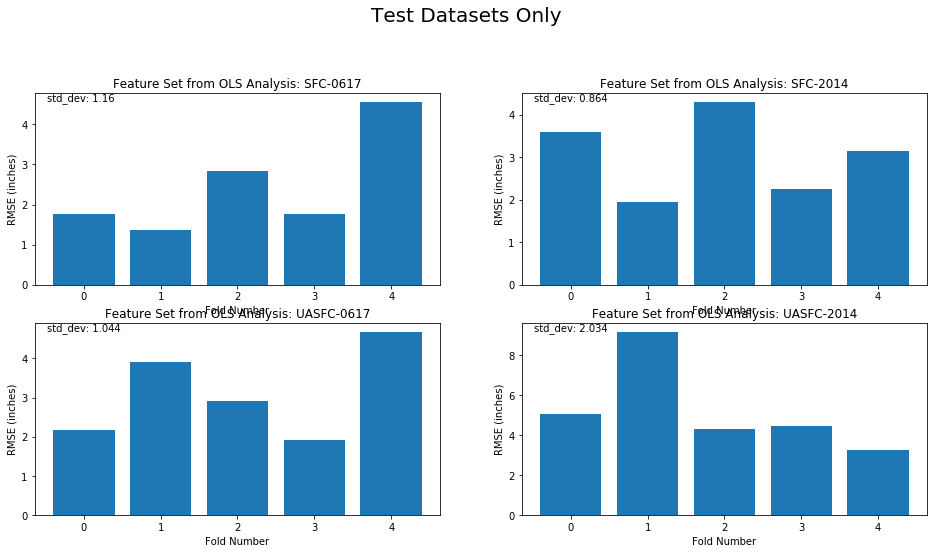

In [50]:
from sklearn.metrics import mean_squared_error
fig = plt.figure(figsize=(16,12))
fig.tight_layout()
fig.suptitle('Test Datasets Only', fontsize=20)


for f in np.arange(0,len(X_feat_test),1):
 lmmodel = lm
 print(descriptors[f].find('0617')>0)
 print(len(Y_actsnf_test[f]))
 if descriptors[f].find('0617')>0:
#lmmodel_cv.fit(X_feat_train[f], Y_actsnf_train[f])
   Ytest_predictions = cross_val_predict(lmmodel, X_feat_test[f], Y_actsnf_test[f], cv=kfcv_0617)
   scores = cross_val_score(lmmodel, X_feat_test[f], Y_actsnf_test[f], \
                             scoring="neg_mean_squared_error", cv=kfcv_0617)

 
 if descriptors[f].find('2014')>0:
#lmmodel_cv.fit(X_feat_train[f], Y_actsnf_train[f])
   Ytest_predictions = cross_val_predict(lmmodel, X_feat_test[f], Y_actsnf_test[f], cv=kfcv_2014)
   scores = cross_val_score(lmmodel, X_feat_test[f], Y_actsnf_test[f], \
                             scoring="neg_mean_squared_error", cv=kfcv_2014)
 
 std_dev = np.std(np.sqrt(-scores))
 print(std_dev)
 
 plt.subplot(3,2,f+1)
 plt.bar([p + 0 for p in np.arange(0, len(scores),1)], np.sqrt(-scores))
 plt.title("Feature Set from OLS Analysis: " + descriptors[f])
 plt.xlabel("Fold Number")
 plt.ylabel("RMSE (inches)")
 #plt.annotate("Mean RMSE: "+ str(round(mean_rmse,3)), xy=(0.03, 0.96), xycoords='axes fraction', fontsize=10)
 plt.annotate("std_dev: "+ str(round(std_dev,3)), xy=(0.03, 0.96), xycoords='axes fraction', fontsize=10)
 #print(Ytest_predictions)

 
 rows = zip(Y_actsnf_test[f], Ytest_predictions)
 with open('C:/Users/RAPP/Documents/Capstone/Projects/model_predictions/'+descriptors[f]+'CVLM_testset.csv', "w") as file:
  writer = csv.writer(file)
  for row in rows:
      writer.writerow(row)
#plt.scatter(Y_actsnf_test[f], Ytest_predictions)
plt.show()
 

# All Data

True
213
213
[1.7234179  2.24141133 1.92168348 2.12906072 2.50778089]
0.2685623633013698
False
213
213
[1.69773724 2.25154023 1.96584791 2.10349565 2.49651291]
0.2683152796594915
True
213
213
[1.60342893 2.29428529 1.87262839 2.10383623 2.39136224]
0.28633544230045327
False
213
213
[1.86299636 2.50425853 1.75320352 2.22927847 2.31956689]
0.28250779485040173


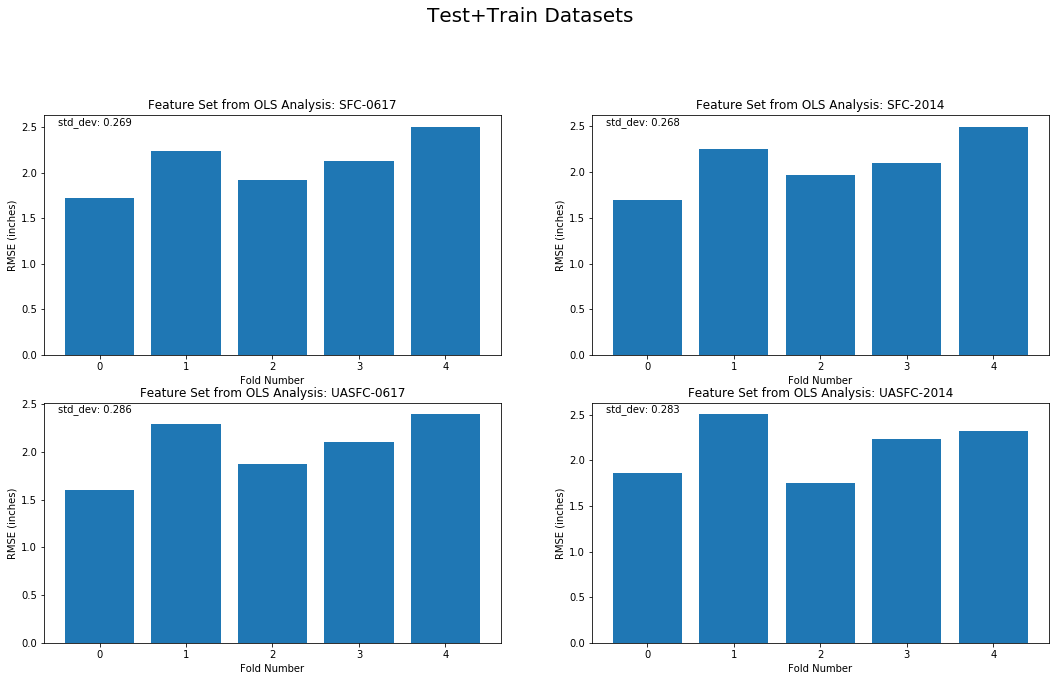

In [49]:
from sklearn.metrics import mean_squared_error
fig = plt.figure(figsize=(18,15))
fig.tight_layout()
fig.suptitle('Test+Train Datasets', fontsize=20)

for f in np.arange(0,len(X_feat_all),1):
 Ytest_predictions, scores = [], []
 lmmodel = lm
 print(descriptors[f].find('0617')>0)
 print(len(Y_actsnf_all[f]))

#lmmodel_cv.fit(X_feat_train[f], Y_actsnf_train[f])
 Ytest_predictions = cross_val_predict(lmmodel, X_feat_all[f], Y_actsnf_all[f], cv=kfcv_all)
 scores = cross_val_score(lmmodel, X_feat_all[f], Y_actsnf_all[f], \
                             scoring="neg_mean_squared_error", cv=kfcv_all)

 print(len(Ytest_predictions))
 #rmse = np.sqrt(mean_squared_error(Y_actsnf_test[f], Ytest_predictions))
 #print(rmse)  
 print(np.sqrt(-scores))
 mean_rmse = np.mean(np.sqrt(-scores))
 std_dev = np.std(np.sqrt(-scores))
 print(std_dev)
 
 plt.subplot(3,2,f+1)
 plt.bar([p + 0 for p in np.arange(0, len(scores),1)], np.sqrt(-scores))
 plt.title("Feature Set from OLS Analysis: " + descriptors[f])
 plt.xlabel("Fold Number")
 plt.ylabel("RMSE (inches)")
 #plt.annotate("Mean RMSE: "+ str(round(mean_rmse,3)), xy=(0.03, 0.96), xycoords='axes fraction', fontsize=10)
 plt.annotate("std_dev: "+ str(round(std_dev,3)), xy=(0.03, 0.96), xycoords='axes fraction', fontsize=10)
 #print(Ytest_predictions)

 
 rows = zip(Y_actsnf_test[f], Ytest_predictions)
 with open('C:/Users/RAPP/Documents/Capstone/Projects/model_predictions/'+descriptors[f]+'CVLM.csv', "w") as file:
  writer = csv.writer(file)
  for row in rows:
      writer.writerow(row)
#plt.scatter(Y_actsnf_test[f], Ytest_predictions)
plt.show()
 